# Amsterdam Bike Usage Prediction - Data Preprocessing

This notebook processes and analyzes the collected data.

In [1]:
import sys
sys.path.append('..')

from src.data.data_processor import DataProcessor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load and Process Data

In [2]:
# First, let's verify our data files exist
import os

bike_file = '../data/raw/bike_counts.csv'
weather_file = '../data/raw/weather_data.csv'

print(f"Bike data exists: {os.path.exists(bike_file)}")
print(f"Weather data exists: {os.path.exists(weather_file)}")

Bike data exists: True
Weather data exists: True


In [10]:
# Initialize processor and process data
processor = DataProcessor()
processed_data = processor.process_data(
    bike_file=bike_file,
    weather_file=weather_file,
    locations_file='data/raw/locations.csv',
    save_path='../data/processed/processed_data.csv'
)

TypeError: DataProcessor.process_data() got an unexpected keyword argument 'locations_file'

In [4]:
# Load both datasets
bike_data = pd.read_csv('../data/raw/bike_counts.csv')
weather_data = pd.read_csv('../data/raw/weather_data.csv')

# Convert timestamps
bike_data['timestamp'] = pd.to_datetime(bike_data['timestamp'])
weather_data['timestamp'] = pd.to_datetime(weather_data['timestamp'])

# Check date ranges
print("Bike Data Date Range:")
print(f"Start: {bike_data['timestamp'].min()}")
print(f"End: {bike_data['timestamp'].max()}")
print(f"Total hours: {len(bike_data)}")

print("\nWeather Data Date Range:")
print(f"Start: {weather_data['timestamp'].min()}")
print(f"End: {weather_data['timestamp'].max()}")
print(f"Total hours: {len(weather_data)}")

# Check for NaN values in bike data
print("\nNaN values in Bike Data:")
for column in bike_data.columns:
    nan_count = bike_data[column].isna().sum()
    if nan_count > 0:
        print(f"{column}: {nan_count} NaN values ({(nan_count/len(bike_data)*100):.2f}%)")

# Check for NaN values in weather data
print("\nNaN values in Weather Data:")
for column in weather_data.columns:
    nan_count = weather_data[column].isna().sum()
    if nan_count > 0:
        print(f"{column}: {nan_count} NaN values ({(nan_count/len(weather_data)*100):.2f}%)")

# Function to check NaNs for specific column
def check_column_nans(df, column_name):
    if column_name in df.columns:
        nan_count = df[column_name].isna().sum()
        print(f"\nDetailed check for column '{column_name}':")
        print(f"Total NaN values: {nan_count}")
        print(f"Percentage: {(nan_count/len(df)*100):.2f}%")
        if nan_count > 0:
            print("\nFirst few rows with NaN values:")
            print(df[df[column_name].isna()].head())
    else:
        print(f"Column '{column_name}' not found in dataframe")

# Example usage:
print("\nChecking specific columns:")
check_column_nans(weather_data, 'temperature')  # Replace with any column name you want to check

Bike Data Date Range:
Start: 2024-12-31 04:56:59.990346
End: 2025-01-31 03:56:59.990346
Total hours: 2232

Weather Data Date Range:
Start: 2024-12-31 03:04:04
End: 2025-01-31 02:04:04
Total hours: 744

NaN values in Bike Data:

NaN values in Weather Data:
temperature: 51 NaN values (6.85%)
wind_speed: 51 NaN values (6.85%)
cloud_cover: 51 NaN values (6.85%)

Checking specific columns:

Detailed check for column 'temperature':
Total NaN values: 51
Percentage: 6.85%

First few rows with NaN values:
              timestamp  temperature  rain  wind_speed  cloud_cover
693 2025-01-29 00:04:04          NaN   0.0         NaN          NaN
694 2025-01-29 01:04:04          NaN   0.0         NaN          NaN
695 2025-01-29 02:04:04          NaN   0.0         NaN          NaN
696 2025-01-29 03:04:04          NaN   0.0         NaN          NaN
697 2025-01-29 04:04:04          NaN   0.0         NaN          NaN


## 2. Analyze Processed Data

In [5]:
# Load processed data
processed_data = pd.read_csv('../data/processed/processed_data.csv')

# Display sample of processed data
print("Sample of processed data:")
print(processed_data.head())

# Print dataset shape and columns
print("\nDataset shape:", processed_data.shape)
print("\nColumns:", processed_data.columns.tolist())

Sample of processed data:
   hour  day_of_week  month     count  location_id       timestamp_hour  \
0     4            1     12  0.034483            1  2024-12-31 04:00:00   
1     4            1     12  0.018678            2  2024-12-31 04:00:00   
2     4            1     12  0.024425            3  2024-12-31 04:00:00   
3     5            1     12  0.048851            1  2024-12-31 05:00:00   
4     5            1     12  0.028736            2  2024-12-31 05:00:00   

   temperature  rain  wind_speed  cloud_cover                   timestamp  \
0     0.752357   0.0    0.715256          8.0  2024-12-31 04:56:59.990346   
1     0.752357   0.0    0.715256          8.0  2024-12-31 04:56:59.990346   
2     0.752357   0.0    0.715256          8.0  2024-12-31 04:56:59.990346   
3     0.728986   0.0    0.761610          8.0  2024-12-31 05:56:59.990346   
4     0.728986   0.0    0.761610          8.0  2024-12-31 05:56:59.990346   

   hour_sin  hour_cos  is_weekend  is_rush_hour  
0  0.86602

Available numeric columns: ['hour', 'day_of_week', 'month', 'count', 'location_id', 'temperature', 'rain', 'wind_speed', 'cloud_cover', 'hour_sin', 'hour_cos', 'is_weekend', 'is_rush_hour']


<Figure size 1000x800 with 0 Axes>

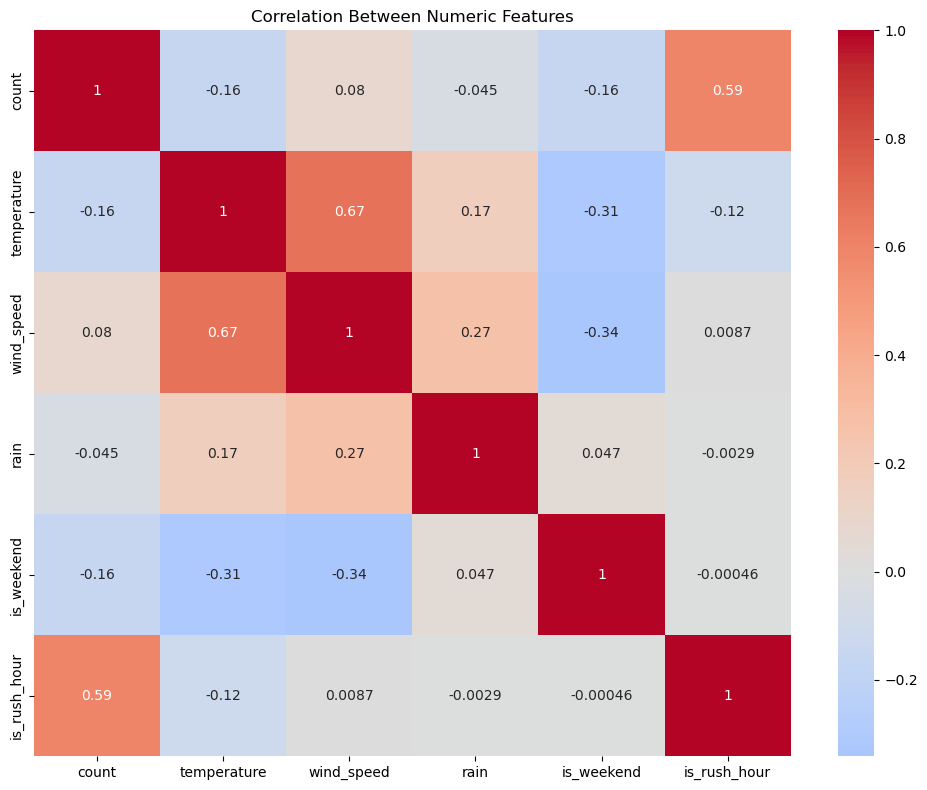

In [6]:
# Correlation analysis
plt.figure(figsize=(10, 8))

# Get numeric columns for correlation
numeric_columns = processed_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Available numeric columns:", numeric_columns)

# Select columns for correlation (excluding non-numeric or problematic columns)
correlation_columns = [col for col in ['count', 'temperature', 'wind_speed', 'rain', 'is_weekend', 'is_rush_hour'] if col in numeric_columns]

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    processed_data[correlation_columns].corr(),
    annot=True,
    cmap='coolwarm',
    center=0
)
plt.title('Correlation Between Numeric Features')
plt.tight_layout()
plt.show()

### The correlation heatmap revealed a correlation coefficient of 0.59 between the 'count' and 'is_rush_hour' features. This indicates a moderately strong positive relationship, meaning that bike counts tend to be higher during the designated rush hour periods.

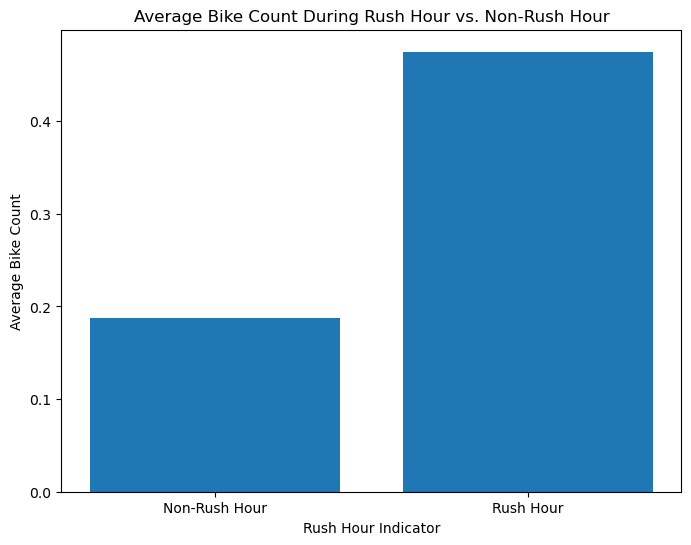

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the processed data
processed_data = pd.read_csv('../data/processed/processed_data.csv')

# Calculate the average bike count for rush hour and non-rush hour
rush_hour_avg = processed_data[processed_data['is_rush_hour'] == 1]['count'].mean()
non_rush_hour_avg = processed_data[processed_data['is_rush_hour'] == 0]['count'].mean()

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(['Non-Rush Hour', 'Rush Hour'], [non_rush_hour_avg, rush_hour_avg])
ax.set_title('Average Bike Count During Rush Hour vs. Non-Rush Hour')
ax.set_xlabel('Rush Hour Indicator')
ax.set_ylabel('Average Bike Count')

plt.show()